In [1]:
import pandas as pd

##  Load the dataset

In [2]:
df=pd.read_excel('Pubmed5k.xlsx')

In [3]:
df.head()

,ArticleID,Title,Abstract
0,34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...
1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...
2,34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...
3,34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...
4,34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...


## explore the dataset

In [4]:
print("the length of the dataset is #{}".format(len(df)))
print("-"*100)
df.info(abs)

the length of the dataset is #4999
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleID  4999 non-null   int64 
 1   Title      4999 non-null   object
 2   Abstract   4999 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


No null values

## Data Preprocessing ##

We will perform the following steps:

* **Tokenization**: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
* Words that have fewer than 3 characters are removed.
* All **stopwords** are removed.
* Words are **lemmatized** - words in third person are changed to first person and verbs in past and future tenses are changed into present.
* Words are **stemmed** - words are reduced to their root form.


In [5]:
'''
Loading Gensim and nltk libraries
'''
# pip install gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import PorterStemmer
import numpy as np
import nltk
nltk.download('wordnet')
print("All Done!")

All Done!


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Eslam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
'''
a function to perform the pre processing steps on the entire dataset
'''
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 4:
            # Apply lemmatize_stemming on the token, then add to the results list
            result.append(lemmatize_stemming(token))
    return result

In [7]:
# preprocess all the abstracts, saving the list of results as 'processed_docs'
processed_docs = df['Abstract'].map(preprocess)

In [8]:
processed_docs[:10]

0    [coordin, variabl, commonli, analyz, understan...
1    [clinic, scenario, dynam, valgu, mechan, alter...
2    [methodolog, report, assess, world, epidemiolo...
3    [outcom, acut, ischem, stroke, accord, clinic,...
4    [hear, children, result, development, deficit,...
5    [despit, grow, number, immigr, popul, exist, p...
6    [histor, treatment, lupu, nephriti, neutrophil...
7    [progress, chronic, kidney, diseas, individu, ...
8    [immunoglobulin, nephropathi, common, primari,...
9    [kidney, transplant, precis, medicin, enter, c...
Name: Abstract, dtype: object

## Step 3.1: Bag of words on the dataset

Now let's create a dictionary from 'processed_docs' containing the number of times a word appears in the training set. To do that, let's pass `processed_docs` to [`gensim.corpora.Dictionary()`](https://radimrehurek.com/gensim/corpora/dictionary.html) and call it '`dictionary`'.

In [9]:
'''
Create a dictionary from 'processed_docs' containing the number of times a word appears 
in the training set using gensim.corpora.Dictionary and call it 'dictionary'
'''
dictionary = gensim.corpora.Dictionary(processed_docs)
'''
Checking dictionary created
'''
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 achiev
1 analyz
2 approach
3 averag
4 awar
5 calcul
6 captur
7 cod
8 commonli
9 compar
10 consequ


** Gensim filter_extremes **

[`filter_extremes(no_below=5, no_above=0.5, keep_n=100000)`](https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes)

Filter out tokens that appear in

* less than no_below documents (absolute number) or
* more than no_above documents (fraction of total corpus size, not absolute number).
* after (1) and (2), keep only the first keep_n most frequent tokens (or keep all if None).

In [10]:
'''
Remove very rare and very common words:
- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''
# apply dictionary.filter_extremes() with the parameters mentioned above
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)

In [11]:
'''
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# TF-IDF "Term Frequency, Inverse Document Frequency

In [12]:
'''
Create tf-idf model object using models.TfidfModel on 'bow_corpus' and save it to 'tfidf'
'''
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)

In [13]:
'''
Apply transformation to the entire corpus and call it 'corpus_tfidf'
'''
corpus_tfidf = tfidf[bow_corpus]

In [14]:
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.066064425942791),
 (1, 0.072696238897134),
 (2, 0.09210696137063167),
 (3, 0.14661527163280644),
 (4, 0.09981371901150272),
 (5, 0.19209761940306322),
 (6, 0.0850780048176935),
 (7, 0.08075908041630712),
 (8, 0.1035415054767607),
 (9, 0.19156480551605135),
 (10, 0.10077397657176254),
 (11, 0.0710445239022165),
 (12, 0.10709498663204674),
 (13, 0.21089995526894145),
 (14, 0.0583816214440136),
 (15, 0.08020131993250293),
 (16, 0.07722514195693918),
 (17, 0.10110285314299568),
 (18, 0.09950203910411679),
 (19, 0.13850363445700775),
 (20, 0.21592421335563822),
 (21, 0.0783459151757125),
 (22, 0.10466816420345644),
 (23, 0.11230923116929416),
 (24, 0.05911014169870544),
 (25, 0.14787024792357434),
 (26, 0.18331415365549042),
 (27, 0.07151855886757341),
 (28, 0.13850363445700775),
 (29, 0.10012952724950074),
 (30, 0.32522335933880175),
 (31, 0.17905361221768115),
 (32, 0.06021661689214033),
 (33, 0.06106608186610225),
 (34, 0.06430289849639906),
 (35, 0.5231080895926992),
 (36, 0.1316

In [15]:
from gensim.models import CoherenceModel

# LDA Tuning: Finding the optimal number of topics
Finding the optimal number of topics in a topic model is tough, given that it is like a model hyperparameter that you always have to set before training the model. We can use an iterative approach and build several models with differing numbers of topics and select the one that has the highest coherence score.


In [16]:
def topic_model_coherence_generator(corpus, texts, dictionary, 
                                    start_topic_count=2, end_topic_count=10, step=1):
    models = []
    coherence_scores = []
    
    for topic_nums in range(start_topic_count, end_topic_count+1, step):
        
        lda_model = gensim.models.LdaMulticore(corpus_tfidf, 
                                             num_topics=topic_nums, 
                                             id2word = dictionary, 
                                             passes = 2, 
                                             workers=4)
        
        cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=corpus, 
                                                                     texts=texts, dictionary=dictionary, 
                                                                     coherence='c_v')
        coherence_score = cv_coherence_model_lda.get_coherence()
        
        coherence_scores.append(coherence_score)
        
        models.append(lda_model)
    
    return models, coherence_scores

In [17]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=bow_corpus, texts=processed_docs,
                                                               dictionary=dictionary, start_topic_count=2,
                                                               end_topic_count=30, step=1)

In [18]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 31, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df=coherence_df.sort_values(by=['Number of Topics'], ascending=True)
coherence_df.head()

,Number of Topics,Coherence Score
0,2,0.2597
1,3,0.2776
2,4,0.2380
3,5,0.2400
4,6,0.2402


In [28]:
num_of_topics=coherence_df['Number of Topics'].values[coherence_df['Coherence Score']==np.max(coherence_df['Coherence Score'])]
print("The optimal number of topics are {} topics".format(int(num_of_topics)))

The optimal number of topics are 8 topics


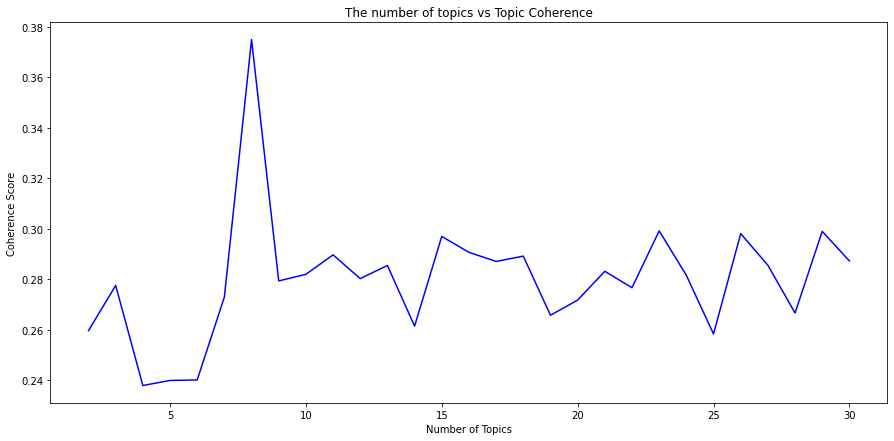

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
x_ax = coherence_df['Number of Topics']
y_ax = coherence_df['Coherence Score']
plt.figure(figsize=(15, 7));
plt.plot(x_ax, y_ax, c='b');
xl = plt.xlabel('Number of Topics');
yl = plt.ylabel('Coherence Score');
plt.title("The number of topics vs Topic Coherence");

# Final Model
Let’s train the final model using the above selected parameters

In [30]:
lda_model = gensim.models.LdaMulticore(corpus_tfidf, 
                                             num_topics=8, 
                                             id2word = dictionary, 
                                             passes = 2, 
                                             workers=4)

In [31]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.003*"intervent" + 0.002*"commun" + 0.002*"water" + 0.002*"stress" + 0.002*"children" + 0.002*"manag" + 0.002*"trial" + 0.002*"speci" + 0.002*"women" + 0.002*"physic"


Topic: 1 Word: 0.004*"cell" + 0.003*"cancer" + 0.003*"protein" + 0.003*"express" + 0.003*"imag" + 0.003*"infect" + 0.002*"tumor" + 0.002*"therapi" + 0.002*"pandem" + 0.002*"induc"


Topic: 2 Word: 0.004*"express" + 0.004*"cell" + 0.003*"protein" + 0.003*"gene" + 0.003*"cancer" + 0.003*"tumor" + 0.002*"immun" + 0.002*"speci" + 0.002*"metabol" + 0.002*"tissu"


Topic: 3 Word: 0.004*"cancer" + 0.004*"speci" + 0.003*"protein" + 0.003*"tumor" + 0.002*"cell" + 0.002*"infect" + 0.002*"score" + 0.002*"therapi" + 0.002*"cognit" + 0.002*"surviv"


Topic: 4 Word: 0.003*"speci" + 0.003*"women" + 0.003*"predict" + 0.003*"valid" + 0.003*"score" + 0.003*"cohort" + 0.003*"cancer" + 0.002*"hospit" + 0.002*"children" + 0.002*"medic"


Topic: 5 Word: 0.007*"speci" + 0.004*"cancer" + 0.003*"cell" + 0.003*"express" + 0.003*"

In [43]:
topics = [[(term, round(wt, 3)) 
               for term, wt in lda_model.show_topic(n, topn=10)] 
                   for n in range(0, lda_model.num_topics)]
for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['intervent', 'commun', 'water', 'stress', 'children', 'manag', 'trial', 'speci', 'women', 'physic']

Topic #2:
['cell', 'cancer', 'protein', 'express', 'imag', 'infect', 'tumor', 'therapi', 'pandem', 'induc']

Topic #3:
['express', 'cell', 'protein', 'gene', 'cancer', 'tumor', 'immun', 'speci', 'metabol', 'tissu']

Topic #4:
['cancer', 'speci', 'protein', 'tumor', 'cell', 'infect', 'score', 'therapi', 'cognit', 'surviv']

Topic #5:
['speci', 'women', 'predict', 'valid', 'score', 'cohort', 'cancer', 'hospit', 'children', 'medic']

Topic #6:
['speci', 'cancer', 'cell', 'express', 'infect', 'describ', 'genu', 'exposur', 'region', 'induc']

Topic #7:
['vaccin', 'children', 'speci', 'commun', 'infect', 'women', 'medic', 'case', 'plant', 'product']

Topic #8:
['speci', 'student', 'describ', 'genu', 'pandem', 'mental', 'hospit', 'social', 'injuri', 'infect']



In [51]:
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, lda_model.num_topics+1)]
                         )
topics_df

<ipython-input-51-8fa5e6084872>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Terms per Topic
Topic1,"intervent, commun, water, stress, children, manag, trial, speci, women, physic"
Topic2,"cell, cancer, protein, express, imag, infect, tumor, therapi, pandem, induc"
Topic3,"express, cell, protein, gene, cancer, tumor, immun, speci, metabol, tissu"
Topic4,"cancer, speci, protein, tumor, cell, infect, score, therapi, cognit, surviv"
Topic5,"speci, women, predict, valid, score, cohort, cancer, hospit, children, medic"
Topic6,"speci, cancer, cell, express, infect, describ, genu, exposur, region, induc"
Topic7,"vaccin, children, speci, commun, infect, women, medic, case, plant, product"
Topic8,"speci, student, describ, genu, pandem, mental, hospit, social, injuri, infect"


In [50]:
topics_coherences

[([(0.003987196, 'express'), (0.003864196, 'cell'), (0.003283936, 'protein')],
  -1.01031856144754),
 ([(0.0039154612, 'cell'),
   (0.0034342548, 'cancer'),
   (0.0033415852, 'protein')],
  -1.4933130140974107),
 ([(0.0071031307, 'speci'), (0.0040330733, 'cancer'), (0.002954567, 'cell')],
  -2.84450723378802),
 ([(0.0039181635, 'cancer'),
   (0.003827193, 'speci'),
   (0.0030782279, 'protein')],
  -2.9206140092640767),
 ([(0.0025686638, 'intervent'),
   (0.0024260844, 'commun'),
   (0.002409402, 'water')],
  -3.0464439283767533),
 ([(0.0032283827, 'speci'), (0.003092864, 'women'), (0.0028563526, 'predict')],
  -3.1781013379788057),
 ([(0.0035089897, 'vaccin'),
   (0.0033136192, 'children'),
   (0.0028914541, 'speci')],
  -3.7462230992609924),
 ([(0.00793406, 'speci'), (0.003043259, 'student'), (0.0029506555, 'describ')],
  -9.74918661359917)]